# Homework 4  (due 19th October, 11:59 PM)

1.  Use Iris dataset with only two features, namely sepal length (cm) and petal length (cm).
2.  Convert your data into a two-class dataset, such that Virginica (class=2) will be one class and Setosa and Versicolor (class=1 and class=0) samples will constitute the other class.
3.  Get your new dataset ready to be fed into the provided plot_2d_examples function.
4.  Using plot_2d_examples function, train and evaluate different kNN classifiers. Try several $k$ values (in a range from 1 to 21).
5.  Do not separate the train/test sets by yourselves, just feed into plot_2d_examples. It has its own split inside. Also it prints test set scores on the bottom corner of each figure. According to these scores, which $k$ value (or a range of $k$ values) produced the best results? And which intervals of $k$ can be considered as underfit or overfit?

In [52]:
#Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import polynomial_kernel
import pandas as pd  # Import the pandas library


In [53]:
# Load the Iris dataset
data = datasets.load_iris()

In [54]:
#printing the data
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [55]:
#Create a DataFrame from the dataset
iris_df = pd.DataFrame(data=np.c_[data['data'], data['target']],columns= list(data['feature_names']) + ['target'])


In [56]:
#Display the DataFrame
display(iris_df)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [57]:
#Convert data into a two-class dataset
iris_df['target'] = iris_df['target'].apply(lambda x: 0 if x in [0, 1] else 1)

In [58]:
#Prepare the dataset list
X = iris_df[['sepal length (cm)', 'petal length (cm)']].values
y = iris_df['target'].values
new_dataset = [(X, y)]

In [59]:
#Define a function to plot 2D examples
def plot_2d_examples(classifiers, names, datasets, figsize=(27, 9), h=0.02):
    """
    Visualize decision boundaries of classifiers.

    Args:
        classifiers: A list of scikit-learn classifier objects.
        names: A list of strings corresponding to each classifier.
        datasets: A list of 2D datasets, each being a tuple of (X, y).
        figsize: Size of the figure.
        h: Step size of the mesh for plotting.
    """
    figure = plt.figure(figsize=figsize)
    i = 1

    for ds_cnt, ds in enumerate(datasets):
        #Preprocess dataset, split into training and test part
        X, y = ds
        X = StandardScaler().fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

        x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
        y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

        #Plot the dataset
        cm = plt.cm.RdBu
        cm_bright = ListedColormap(['#FF0000', '#0000FF'])
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

        if ds_cnt == 0:
            ax.set_title("Input data")

        #Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')

        #Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.3, edgecolors='k')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        i += 1

        #Iterate over classifiers
        for name, clf in zip(names, classifiers):
            ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
            clf.fit(X_train, y_train)
            score = clf.score(X_test, y_test)

            #Plot the decision boundary
            if hasattr(clf, "decision_function"):
                Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
            else:
                Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

            #Put the result into a color plot
            Z = Z.reshape(xx.shape)
            ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

            #Plot the training points
            ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')

            #Plot the testing points
            ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors='k', alpha=0.3)
            ax.set_xlim(xx.min(), xx.max())
            ax.set_ylim(yy.min(), yy.max())
            ax.set_xticks(())
            ax.set_yticks(())

            if ds_cnt == 0:
                ax.set_title(name)

            ax.text(xx.max() - 0.3, yy.min() + 0.3, ('%.2f' % score).lstrip('0'), size=15, horizontalalignment='right')
            i += 1

    #Display the plots
    plt.tight_layout()
    plt.show()

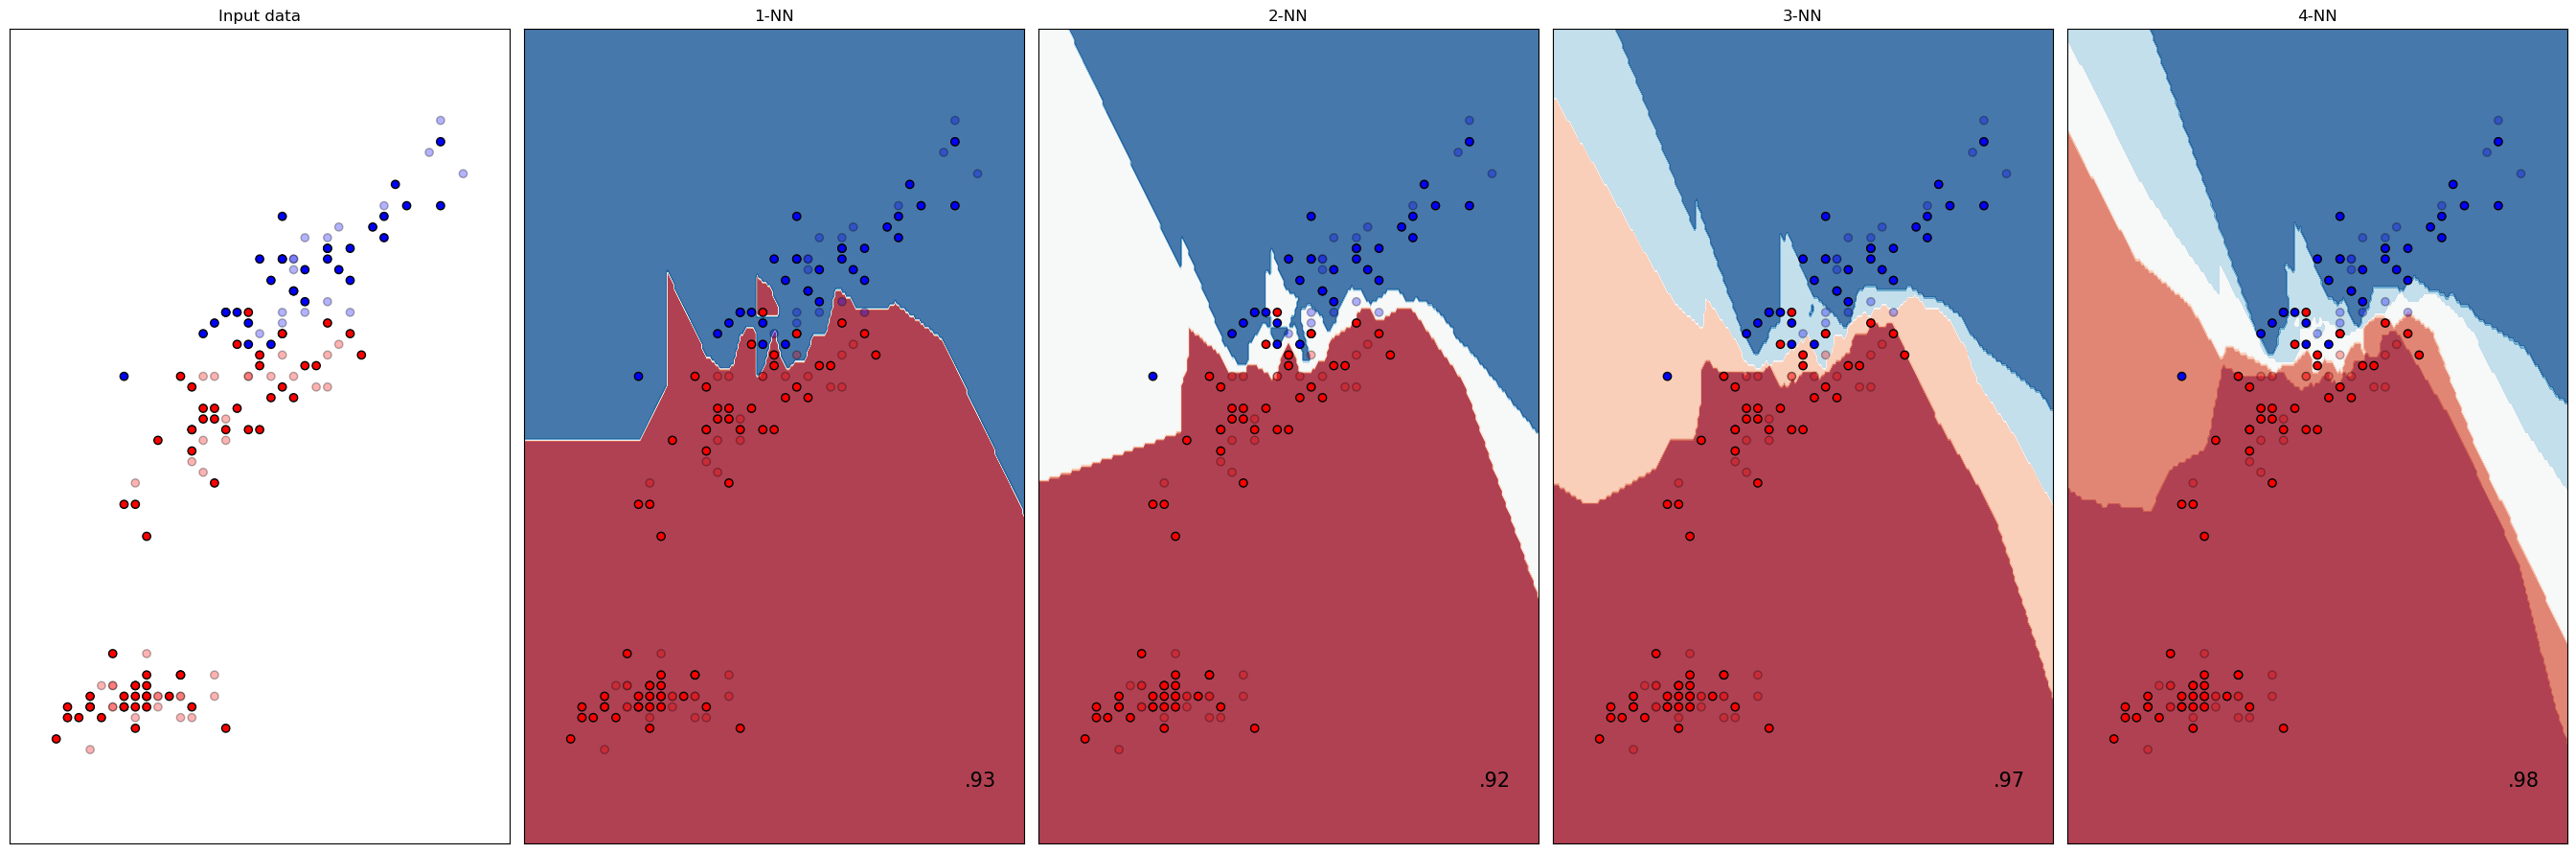

In [60]:
#Create lists for classifiers and their names
classifiers = []
names = []

#Visualize results of applying k-NN [1, 2, 3, 4] on the Iris dataset
for i in range(1, 5):
    classifiers.append(KNeighborsClassifier(n_neighbors=i))
    names.append(str(i) + "-NN")

#Plot the decision boundaries for different k values
plot_2d_examples(classifiers, names, new_dataset, figsize=(27, 9))

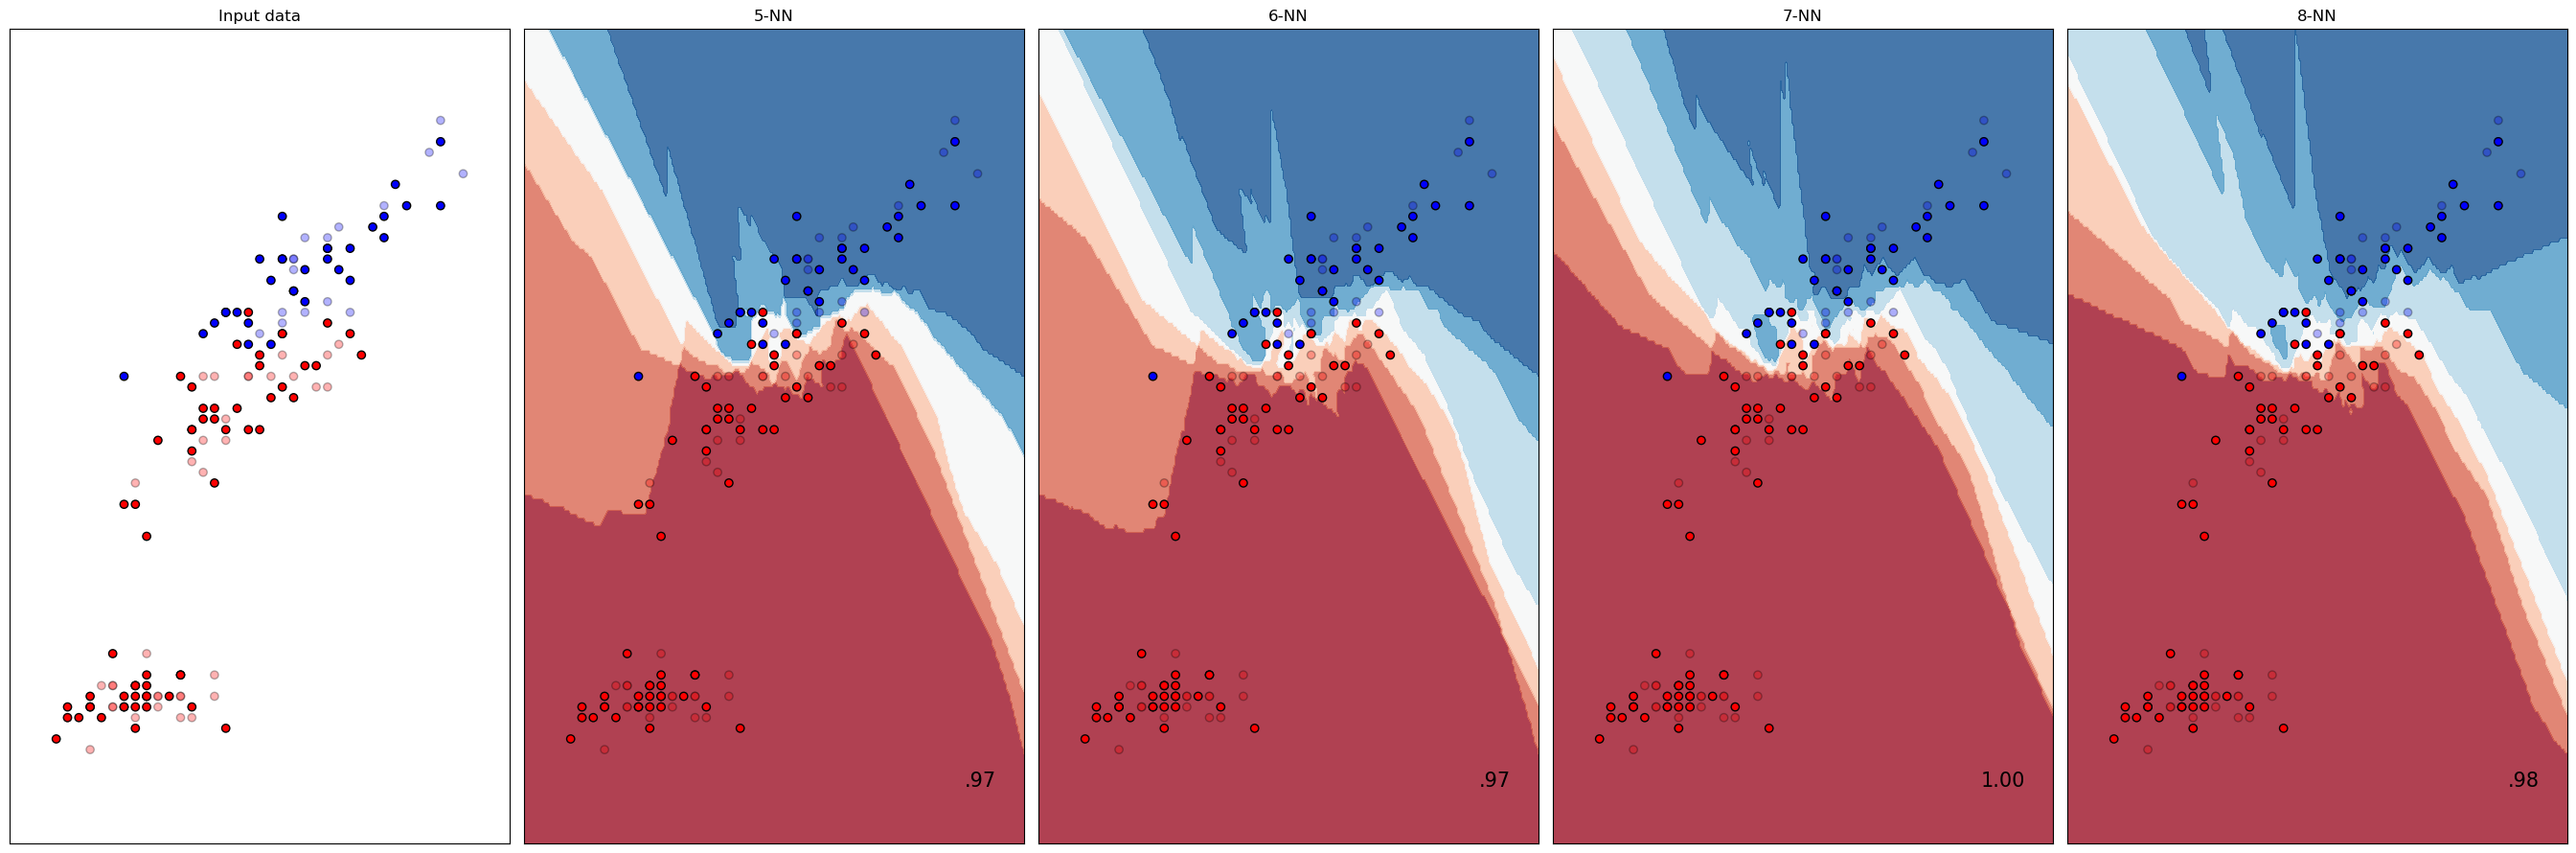

In [51]:
#Create lists for classifiers and their names
classifiers = []
names = []

#Visualize results of applying k-NN in the range from 5 to 9 on the Iris dataset
for i in range(5, 9):  # Include k values from 5 to 9
    classifiers.append(KNeighborsClassifier(n_neighbors=i))
    names.append(str(i) + "-NN")

#Plot the decision boundaries for different k values
plot_2d_examples(classifiers, names, new_dataset, figsize=(27, 9))


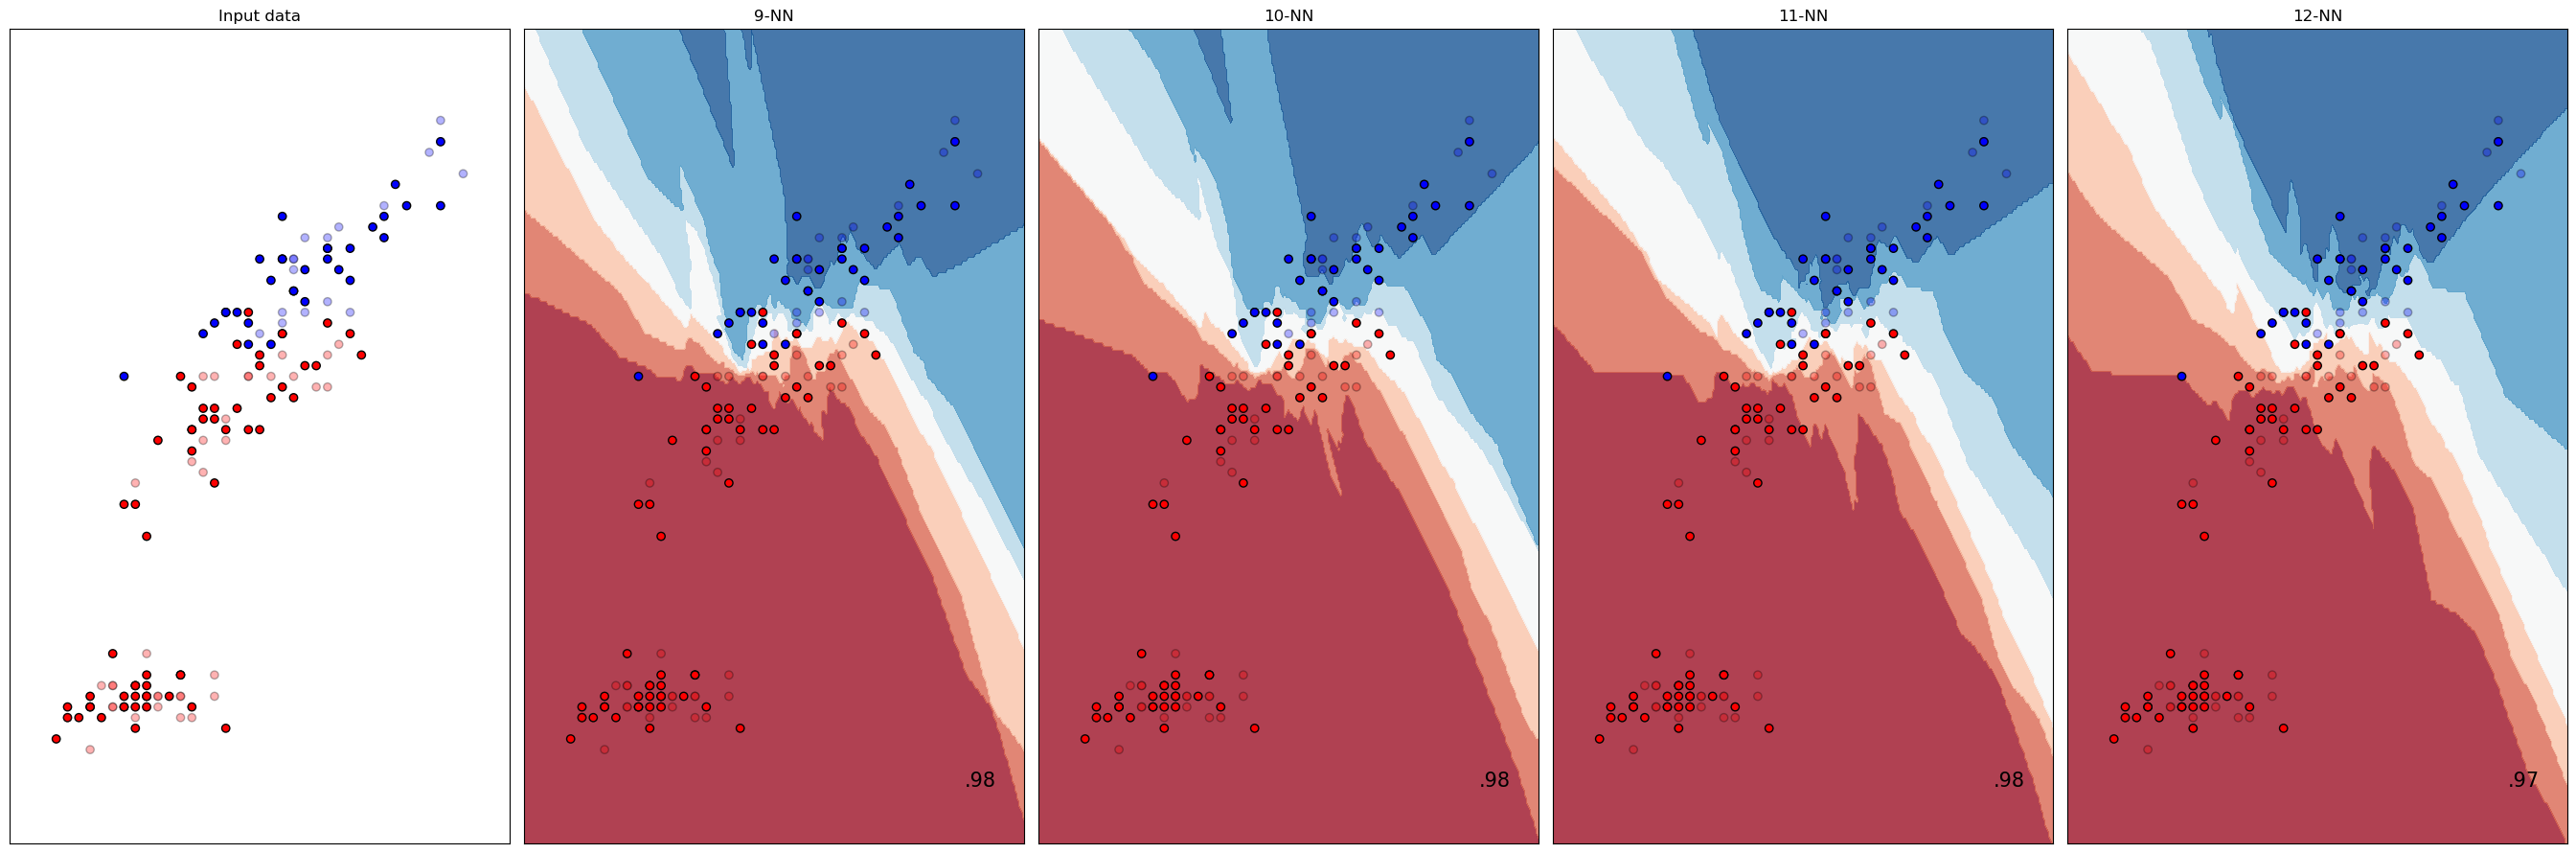

In [48]:
#Create lists for classifiers and their names
classifiers = []
names = []

#Visualize results of applying k-NN in the range from 9 to 13 on the Iris dataset
for i in range(9, 13):  # Include k values from 9 to 13
    classifiers.append(KNeighborsClassifier(n_neighbors=i))
    names.append(str(i) + "-NN")

#Plot the decision boundaries for different k values
plot_2d_examples(classifiers, names, new_dataset, figsize=(27, 9))


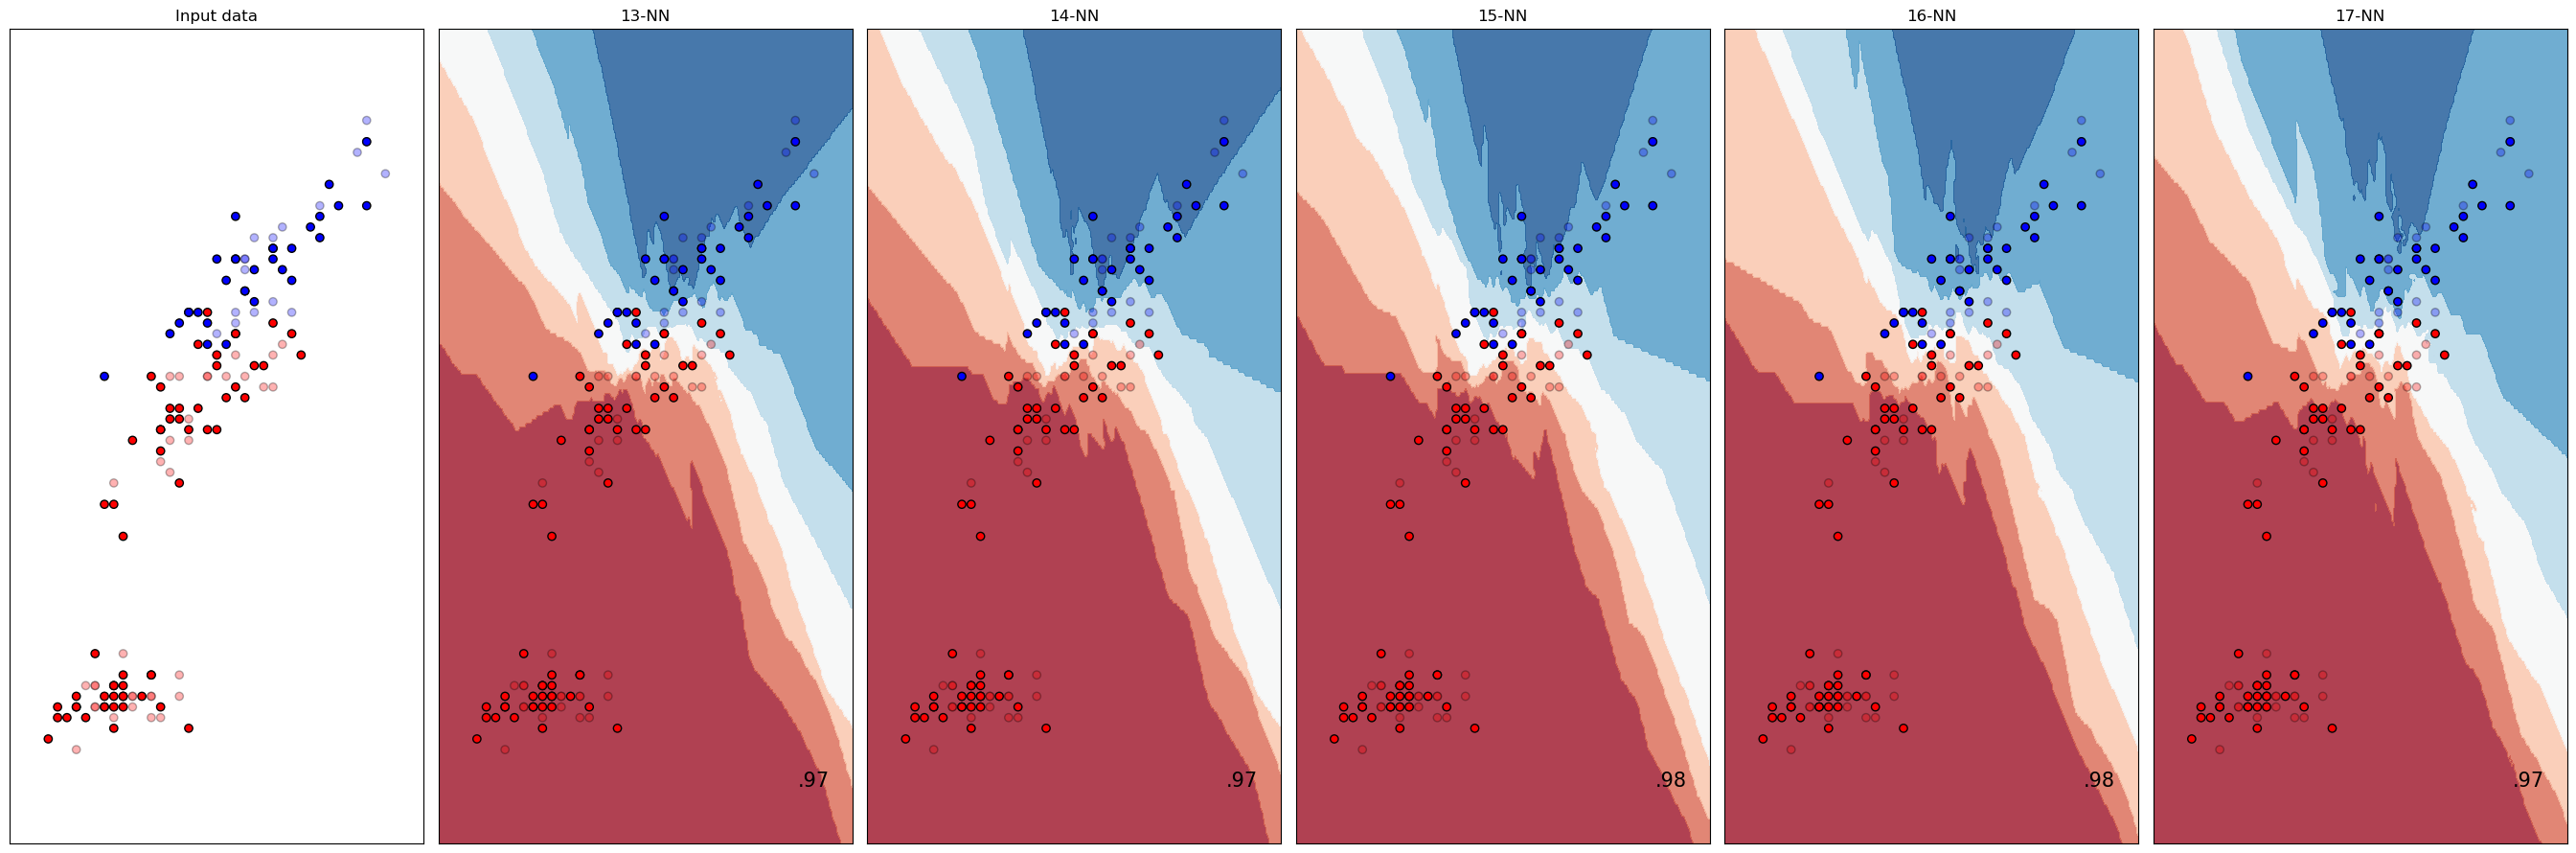

In [49]:
#Create lists for classifiers and their names
classifiers = []
names = []

#Visualize results of applying k-NN in the range from 13 to 18 on the Iris dataset
for i in range(13, 18):  # Include k values from 13 to 18
    classifiers.append(KNeighborsClassifier(n_neighbors=i))
    names.append(str(i) + "-NN")

#Plot the decision boundaries for different k values
plot_2d_examples(classifiers, names, new_dataset, figsize=(27, 9))


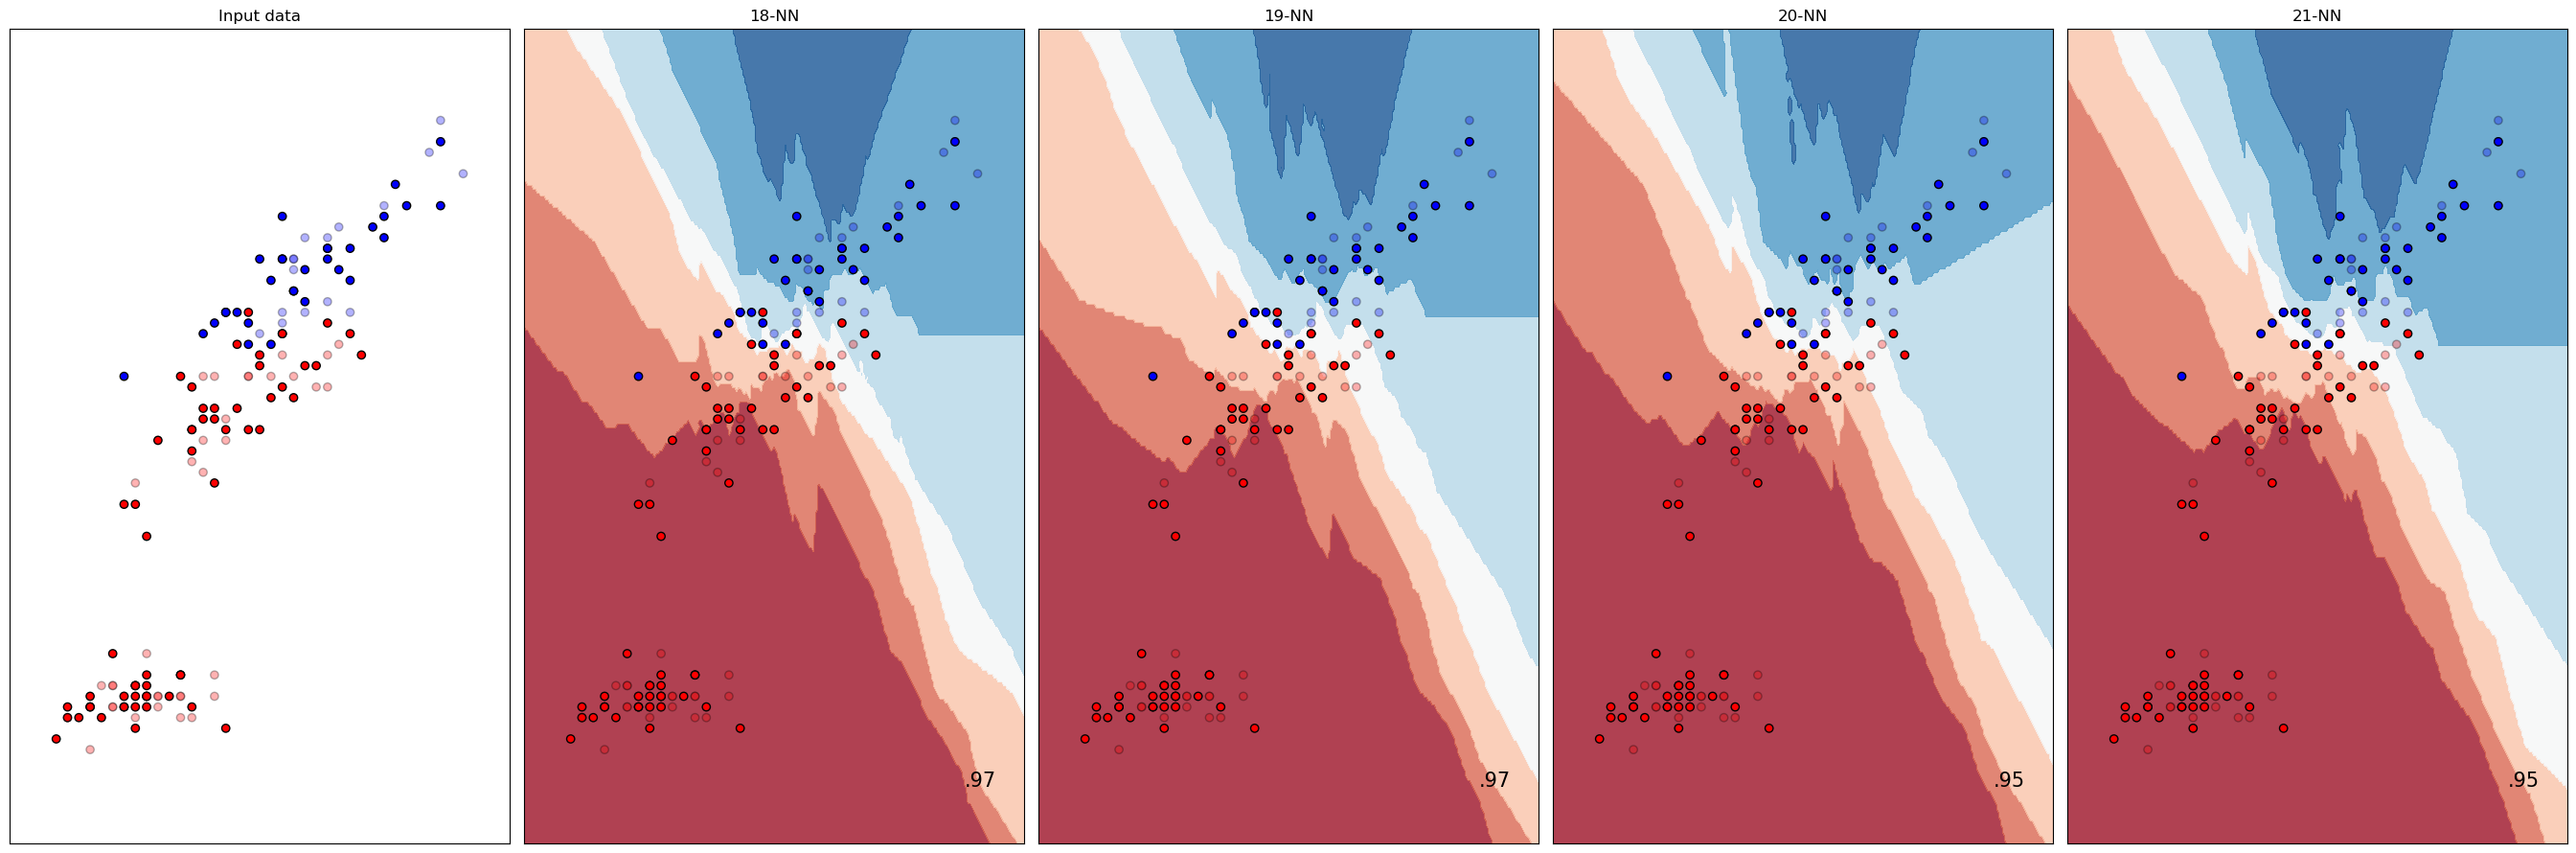

In [50]:
#Create lists for classifiers and their names
classifiers = []
names = []

#Visualize results of applying k-NN in the range from 18 to 22 on the Iris dataset
for i in range(18, 22):  # Include k values from 18 to 22
    classifiers.append(KNeighborsClassifier(n_neighbors=i))
    names.append(str(i) + "-NN")

#Plot the decision boundaries for different k values
plot_2d_examples(classifiers, names, new_dataset, figsize=(27, 9))


# Summary

# The plots visualizes the test set scores for each k value. Here's the summary of test set scores for different k values:

1-NN: 0.93

2-NN: 0.92

3-NN: 0.97

4-NN: 0.98

5-NN: 0.97

6-NN: 0.97

7-NN: 1.00

8-NN: 0.98

9-NN: 0.98

10-NN: 0.98

11-NN: 0.98

12-NN: 0.97

13-NN: 0.97

14-NN: 0.97

15-NN: 0.98

16-NN: 0.98

17-NN: 0.97

18-NN: 0.97

19-NN: 0.97

20-NN: 0.95

21-NN: 0.95

The best performance is achieved with 7-NN, which has a test set score of 1.00. This means that the 7-NN classifier correctly classified all data points in the test set.

The performance remains consistently high for k values from 3 to 13, with test set scores ranging from 0.97 to 1.00. These k values are likely to provide good generalization.

For k values smaller than 3 (1-NN and 2-NN), the test set scores are slightly lower (0.93 and 0.92, respectively). This suggests that a very small k may lead to some underfitting.

For larger k values above 13, the test set scores start to decrease (e.g., 14-NN to 21-NN). This indicates that using a very large k may lead to overfitting, as the model becomes too biased toward the majority class.

In summary, based on the provided test set scores, the best results are achieved with a k value of 7, and a reasonable range of k values for good performance would be from 3 to 13. Smaller or larger values of k may lead to underfitting or overfitting, respectively.